<a href="https://colab.research.google.com/github/francianerod/PROJETOS-SoulCode/blob/main/Projeto_Looker_Vendas_09_04_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Solicitação**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD1

Data de entrega: 09 de abril de 2023

Professor: Igor Gondim

Aluna: Franciane Rodrigues

Colaboração deste código e agradecimentos para: Guilherme Lins e Karen Almeida

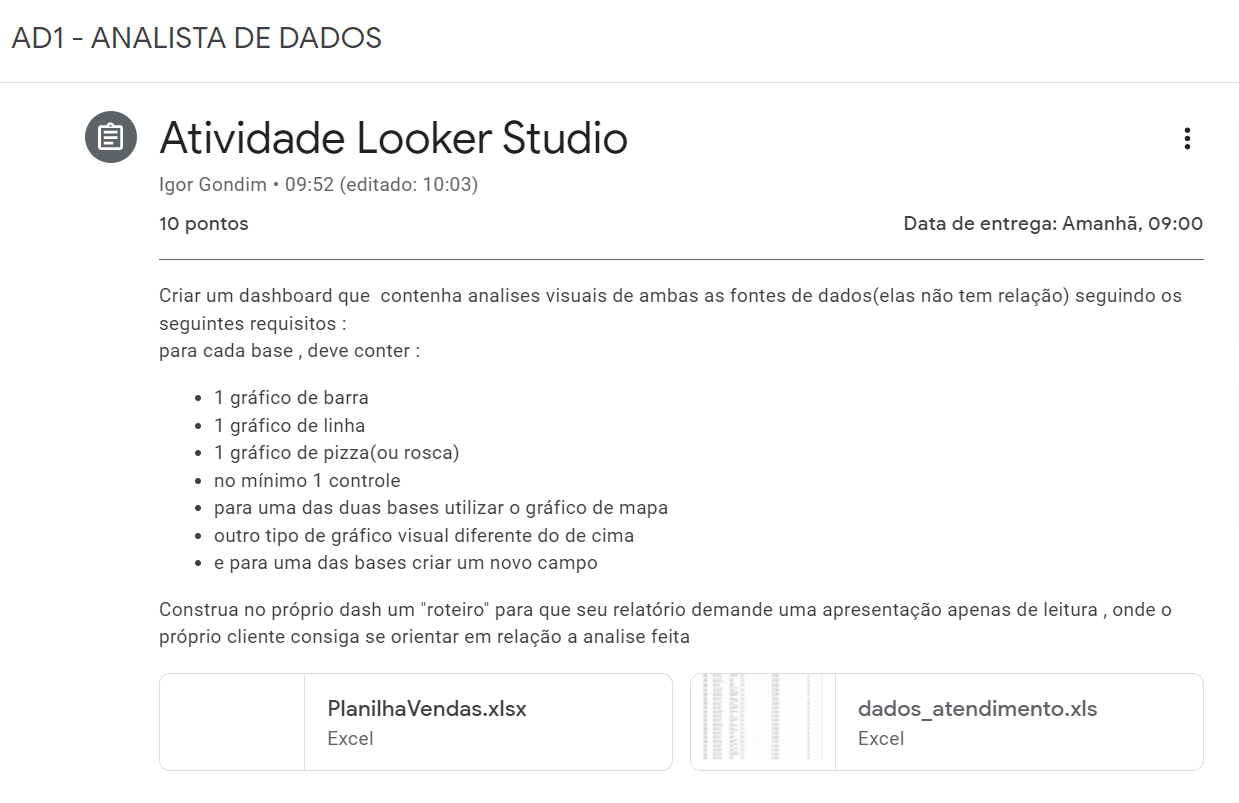

## **Informação da base de dados**

A análise de vendas é a prática de gerar insights de dados de vendas, tendências e métricas para definir metas e prever o desempenho futuro das vendas.

* Order ID: Um ID do pedido é o sistema numérico que a Amazon usa exclusivamente para acompanhar os pedidos. Cada pedido recebe seu próprio ID de pedido que não será duplicado.
*   Product: O produto que foi vendido. 
*   Quantity Ordered: Quantidade encomendada é a quantidade total do item encomendado na encomenda inicial (sem alterações).
*   Price Each: O preço de cada produto.
*   Order Date: Esta é a data em que o cliente está solicitando o envio do pedido.
*   Purchase Address: Endereço para envio

Fonte: https://www.kaggle.com/datasets/knightbearr/sales-product-data



## **Instalação de bibliotecas e importação de módulos**

In [ ]:
# instalação de pacote
#!pip install gcsfs

In [ ]:
# Impotação de módulos
import pandas as pd
import numpy as np
import os
from google.cloud import storage

## **Conector para Cloud Storage(bucket)**

In [ ]:
# Configuração da chave de segurança para acesso ao bucket
serviceAccount = '/content/effective-pipe-377819-3488414144c9.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Informações do arquivo do bucket a ser utilizado
# caminho do bucket: francianerodrigues01/brutos/PlanilhaVendas.xlsx

client = storage.Client()
bucket = client.get_bucket('francianerodrigues01')
bucket.blob('PlanilhaVendas.xlsx')
path = 'gs://francianerodrigues01/brutos/PlanilhaVendas.xlsx'

## **Extração**

In [ ]:
# Extração da base de dados e guardar o backup da base de dados original como segurança
df = pd.read_excel(path)
dfback = df.copy()

## **Pré-Análise**

In [ ]:
# Mostrar a base de dados
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
17485,194090,Google Phone,1,600,2019-08-04 17:11:00,NaN,"177 Jackson St, Los Angeles, CA 90001"
17486,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,NaN,"311 Forest St, Austin, TX 73301"
17487,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,NaN,"347 Sunset St, San Francisco, CA 94016"
17488,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,NaN,"835 Lake St, Portland, OR 97035"


In [ ]:
# Informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17490 entries, 0 to 17489
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16813 non-null  object
 1   Unnamed: 1  16813 non-null  object
 2   Unnamed: 2  16813 non-null  object
 3   Unnamed: 3  16813 non-null  object
 4   Unnamed: 4  16813 non-null  object
 5   Unnamed: 5  961 non-null    object
 6   Unnamed: 6  16813 non-null  object
dtypes: object(7)
memory usage: 956.6+ KB


In [ ]:
# Verificar a quantidade de valores Nulos, ausentes, etc
df.isna().sum()

Unnamed: 0      677
Unnamed: 1      677
Unnamed: 2      677
Unnamed: 3      677
Unnamed: 4      677
Unnamed: 5    16529
Unnamed: 6      677
dtype: int64

## **Transformação**

In [ ]:
# Renomeação de colunas
df.rename(columns={'Unnamed: 0': 'id',
                   'Unnamed: 1': 'produto',
                   'Unnamed: 2': 'quantidade',
                   'Unnamed: 3': 'preço_unit',
                   'Unnamed: 4': 'datahora',
                   'Unnamed: 5': 'Retirar',
                   'Unnamed: 6': 'endereço'
                   },
                   inplace = True)

In [ ]:
# Retirando coluna desnecessária
df.drop(['Retirar'], axis = 1, inplace=True)

In [ ]:
# Trocando as frases: por exemplo a observação 9992 strings e foi transformado em np.nan
df = df.replace({'id': 'Order ID',
                 'produto': 'Product',
                 'quantidade': 'Quantity Ordered',
                 'preço_unit': 'Price Each',
                 'datahora': 'Order Date',
                 'endereço': 'Purchase Address'}, np.nan)

In [ ]:
# Retirando todas as linhas vazias
df = df.dropna()

In [ ]:
# Conversões dos tipos de dados das colunas
df['id'] = df['id'].astype(str)
df['quantidade'] = df['quantidade'].astype(int)
df['preço_unit'] = df['preço_unit'].astype(float)
df['id'] = df['id'].astype(str)
df['datahora'] = pd.to_datetime(df['datahora'])

In [ ]:
# Retirando apenas a data e criando numa nova coluna
df['data'] = df['datahora'].dt.date

In [ ]:
# Retirando apenas a hora e criando uma nova coluna
df['hora'] = df['datahora'].dt.hour

In [ ]:
# Convertendo a coluna data
df['data'] = pd.to_datetime(df['data'])

In [ ]:
# Definição de formato
df['data'] = df['data'].dt.strftime('%m/%d/%Y')

In [ ]:
# Localização das linhas correspondentes em 01/05/2019
df.loc[df['data'] == '01/05/2019']

,id,produto,quantidade,preço_unit,datahora,endereço,data,hora
1736,179076.0,Google Phone,1,600.00,2019-01-05 00:17:00,"635 Chestnut St, San Francisco, CA 94016",01/05/2019,0
1737,179076.0,USB-C Charging Cable,1,11.95,2019-01-05 00:17:00,"635 Chestnut St, San Francisco, CA 94016",01/05/2019,0
1797,179134.0,Apple Airpods Headphones,1,150.00,2019-01-05 02:41:00,"950 Church St, Los Angeles, CA 90001",01/05/2019,2
2716,180017.0,Bose SoundSport Headphones,1,99.99,2019-01-05 00:58:00,"738 Adams St, New York City, NY 10001",01/05/2019,0
3739,180989.0,Apple Airpods Headphones,1,150.00,2019-01-05 00:54:00,"103 Church St, San Francisco, CA 94016",01/05/2019,0
3783,181029.0,Bose SoundSport Headphones,1,99.99,2019-01-05 01:27:00,"348 North St, San Francisco, CA 94016",01/05/2019,1
4015,181248.0,AA Batteries (4-pack),2,3.84,2019-01-05 00:38:00,"753 South St, San Francisco, CA 94016",01/05/2019,0
4429,181645.0,Apple Airpods Headphones,1,150.00,2019-01-05 02:37:00,"514 2nd St, Los Angeles, CA 90001",01/05/2019,2
4473,181688.0,ThinkPad Laptop,1,999.99,2019-01-05 02:07:00,"123 4th St, San Francisco, CA 94016",01/05/2019,2
5665,182822.0,34in Ultrawide Monitor,1,379.99,2019-01-05 00:46:00,"295 Ridge St, Dallas, TX 75001",01/05/2019,0


In [ ]:
# Removendo as linhas de vendas referente a maio
df = df.loc[df['data'] != '01/05/2019']

In [ ]:
# Substituição de valores na coluna data
df.loc[df.data == '01/04/2019', ['data']] = '04/01/2019'
df.loc[df.data == '02/04/2019', ['data']] = '04/02/2019'
df.loc[df.data == '03/04/2019', ['data']] = '04/03/2019'
df.loc[df.data == '05/04/2019', ['data']] = '04/05/2019'
df.loc[df.data == '06/04/2019', ['data']] = '04/06/2019'
df.loc[df.data == '07/04/2019', ['data']] = '04/07/2019'
df.loc[df.data == '08/04/2019', ['data']] = '04/08/2019'
df.loc[df.data == '09/04/2019', ['data']] = '04/09/2019'
df.loc[df.data == '10/04/2019', ['data']] = '04/10/2019'
df.loc[df.data == '11/04/2019', ['data']] = '04/11/2019'
df.loc[df.data == '12/04/2019', ['data']] = '04/12/2019'

In [ ]:
# Verificação de datas no formato mm/dd/yyyy para leitura no looker
sorted(pd.unique(df['data']))

['04/01/2019',
 '04/02/2019',
 '04/03/2019',
 '04/04/2019',
 '04/05/2019',
 '04/06/2019',
 '04/07/2019',
 '04/08/2019',
 '04/09/2019',
 '04/10/2019',
 '04/11/2019',
 '04/12/2019',
 '04/13/2019',
 '04/14/2019',
 '04/15/2019',
 '04/16/2019',
 '04/17/2019',
 '04/18/2019',
 '04/19/2019',
 '04/20/2019',
 '04/21/2019',
 '04/22/2019',
 '04/23/2019',
 '04/24/2019',
 '04/25/2019',
 '04/26/2019',
 '04/27/2019',
 '04/28/2019',
 '04/29/2019',
 '04/30/2019']

In [ ]:
# Verificação de datas
sorted(pd.unique(df['hora']))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [ ]:
# Todos os produtos
sorted(pd.unique(df['produto']))

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

In [ ]:
# Inicio de categorização de produtos 
lista_tv=['34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor']
lista_tel=['iPhone', 'Google Phone', 'Vareebadd Phone']
lista_acs=['Lightning Charging Cable', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones', 'Apple Airpods Headphones']
lista_eletro=['LG Dryer', 'LG Washing Machine']
lista_ele=['ThinkPad Laptop', 'Macbook Pro Laptop','AA Batteries (4-pack)', 'AAA Batteries (4-pack)']

In [ ]:
# Construção de coluna e categorias
df['setor'] = df.loc[df['produto'].isin(lista_tv), 'setor'] = 'TV e Vídeo'
df.loc[df['produto'].isin(lista_tel), 'setor'] = 'Telefone'
df.loc[df['produto'].isin(lista_acs), 'setor'] = 'Acessórios'
df.loc[df['produto'].isin(lista_eletro), 'setor'] = 'Eletrodoméstico'
df.loc[df['produto'].isin(lista_ele), 'setor'] = 'Eletrônico'

In [ ]:
df.head()

,id,produto,quantidade,preço_unit,datahora,endereço,data,hora,setor
624,178000.0,Lightning Charging Cable,1,14.95,2019-04-27 11:47:00,"979 Hickory St, Los Angeles, CA 90001",04/27/2019,11,Acessórios
625,178001.0,USB-C Charging Cable,1,11.95,2019-05-04 10:50:00,"976 Park St, New York City, NY 10001",04/05/2019,10,Acessórios
626,178002.0,USB-C Charging Cable,1,11.95,2019-04-13 17:17:00,"746 Willow St, Los Angeles, CA 90001",04/13/2019,17,Acessórios
627,178003.0,iPhone,1,700.00,2019-04-04 18:52:00,"824 11th St, San Francisco, CA 94016",04/04/2019,18,Telefone
628,178004.0,AA Batteries (4-pack),2,3.84,2019-12-04 19:10:00,"372 Spruce St, Los Angeles, CA 90001",04/12/2019,19,Eletrônico


**Explicação:** A função lambda divide o valor em "x" (ou seja, o valor na coluna "endereço") em uma lista, usando a vírgula como separador, e retorna o segundo elemento da lista, que é a cidade. A expressão x.split(',')[1] divide a string em "x" em uma lista usando a vírgula como separador e retorna o segundo elemento da lista (índice 1), que é a cidade.

In [ ]:
# Separação de cidade
df['cidade'] = df['endereço'].apply(lambda x: x.split(',')[1])

In [ ]:
# Arrumando o id que apareceu ".0" do nada!
df['id'] = df['id'].apply(lambda x: x.split('.')[0])

In [ ]:
df.head()

,id,produto,quantidade,preço_unit,datahora,endereço,data,hora,setor,cidade
624,178000,Lightning Charging Cable,1,14.95,2019-04-27 11:47:00,"979 Hickory St, Los Angeles, CA 90001",04/27/2019,11,Acessórios,Los Angeles
625,178001,USB-C Charging Cable,1,11.95,2019-05-04 10:50:00,"976 Park St, New York City, NY 10001",04/05/2019,10,Acessórios,New York City
626,178002,USB-C Charging Cable,1,11.95,2019-04-13 17:17:00,"746 Willow St, Los Angeles, CA 90001",04/13/2019,17,Acessórios,Los Angeles
627,178003,iPhone,1,700.00,2019-04-04 18:52:00,"824 11th St, San Francisco, CA 94016",04/04/2019,18,Telefone,San Francisco
628,178004,AA Batteries (4-pack),2,3.84,2019-12-04 19:10:00,"372 Spruce St, Los Angeles, CA 90001",04/12/2019,19,Eletrônico,Los Angeles


In [ ]:
#Valor das vendas
df['vendas'] = df['quantidade'] * df['preço_unit'] 

In [ ]:
# Tabela final
df.head(10)

,id,produto,quantidade,preço_unit,datahora,endereço,data,hora,setor,cidade,vendas
624,178000,Lightning Charging Cable,1,14.95,2019-04-27 11:47:00,"979 Hickory St, Los Angeles, CA 90001",04/27/2019,11,Acessórios,Los Angeles,14.95
625,178001,USB-C Charging Cable,1,11.95,2019-05-04 10:50:00,"976 Park St, New York City, NY 10001",04/05/2019,10,Acessórios,New York City,11.95
626,178002,USB-C Charging Cable,1,11.95,2019-04-13 17:17:00,"746 Willow St, Los Angeles, CA 90001",04/13/2019,17,Acessórios,Los Angeles,11.95
627,178003,iPhone,1,700.00,2019-04-04 18:52:00,"824 11th St, San Francisco, CA 94016",04/04/2019,18,Telefone,San Francisco,700.00
628,178004,AA Batteries (4-pack),2,3.84,2019-12-04 19:10:00,"372 Spruce St, Los Angeles, CA 90001",04/12/2019,19,Eletrônico,Los Angeles,7.68
629,178005,USB-C Charging Cable,1,11.95,2019-07-04 12:02:00,"183 Cherry St, San Francisco, CA 94016",04/07/2019,12,Acessórios,San Francisco,11.95
630,178006,Lightning Charging Cable,1,14.95,2019-04-13 22:52:00,"188 Sunset St, Los Angeles, CA 90001",04/13/2019,22,Acessórios,Los Angeles,14.95
631,178007,iPhone,1,700.00,2019-04-14 13:54:00,"824 Jefferson St, New York City, NY 10001",04/14/2019,13,Telefone,New York City,700.00
632,178008,Bose SoundSport Headphones,1,99.99,2019-05-04 07:42:00,"162 West St, Los Angeles, CA 90001",04/05/2019,7,Acessórios,Los Angeles,99.99
633,178009,34in Ultrawide Monitor,1,379.99,2019-10-04 16:01:00,"829 1st St, New York City, NY 10001",04/10/2019,16,TV e Vídeo,New York City,379.99


In [ ]:
# Para testes
df_teste = df.copy()

## **Carregamento**

In [ ]:
# Salva no bucket
df.to_csv('gs://francianerodrigues01/tratados/vendas_tratado.csv', index=False) 

## **Análises - Pré/Dashboard**

In [ ]:
# Análise 1: vendas total do mês
df.vendas.sum()

3108368.889999999

In [ ]:
# Análise 2: Vendas por dia
df['data'] = pd.to_datetime(df['data'])
vendas_por_dia = df.groupby(['data'])['vendas'].sum()
print(vendas_por_dia)

data
2019-04-01     96412.27
2019-04-02     96902.71
2019-04-03    103571.44
2019-04-04    106157.79
2019-04-05    104322.81
2019-04-06    102209.69
2019-04-07     91428.83
2019-04-08     86475.75
2019-04-09    105535.68
2019-04-10    110465.13
2019-04-11     97798.49
2019-04-12    102351.34
2019-04-13     93597.03
2019-04-14     96139.63
2019-04-15    100581.94
2019-04-16    111474.88
2019-04-17    118153.17
2019-04-18    123254.93
2019-04-19     94219.25
2019-04-20     88542.91
2019-04-21    110373.30
2019-04-22     82334.99
2019-04-23    105287.15
2019-04-24    126147.62
2019-04-25    117329.59
2019-04-26    107720.45
2019-04-27    110879.86
2019-04-28     99824.24
2019-04-29    110789.13
2019-04-30    108086.89
Name: vendas, dtype: float64


In [ ]:
# Análise 3: Vendas por hora
vendas_por_hora = df.groupby(['hora'])['vendas'].sum().sort_values(ascending=False)
print(vendas_por_hora)

hora
19    233264.34
12    225228.14
11    209262.89
18    204687.91
20    200105.77
14    190122.09
13    182771.04
10    181890.78
21    177213.14
17    176687.01
15    172455.88
16    168015.78
9     164637.06
22    139292.48
8     106221.53
23    100618.62
0      63775.53
7      57988.49
1      41474.43
6      38986.85
3      19375.28
2      19288.77
5      17928.48
4      17076.60
Name: vendas, dtype: float64


In [ ]:
# Análise 4: Vendas por setor e porcentagem
vendas_por_setor = df.groupby(['setor'])['vendas'].sum().sort_values(ascending=False)
perc_eletro = (1081927.39/3108368.889999999)*100
perc_telefo = (847900.00/3108368.889999999)*100
perc_tvevid = (696708.48/3108368.889999999)*100
perc_acesso = (405633.02/3108368.889999999)*100
perc_eletrod = (76200.00/3108368.889999999)*100

# Mostrar resultados
print(vendas_por_setor)
print('---------------')
print(perc_eletro)
print(perc_telefo)
print(perc_tvevid)
print(perc_acesso)
print(perc_eletrod)

setor
Eletrônico         1081927.39
Telefone            847900.00
TV e Vídeo          696708.48
Acessórios          405633.02
Eletrodoméstico      76200.00
Name: vendas, dtype: float64
---------------
34.80691733470541
27.277972145706304
22.413957437336215
13.0497065938657
2.4514464883863902


In [ ]:
# Análise 5: Cidades que mais venderam no mês
df.groupby(['cidade'])['vendas'].sum().sort_values(ascending=False)

cidade
 San Francisco    742832.65
 Los Angeles      499597.05
 New York City    410535.68
 Boston           326224.88
 Atlanta          268073.61
 Seattle          252534.87
 Dallas           225549.33
 Portland         221229.90
 Austin           161790.92
Name: vendas, dtype: float64

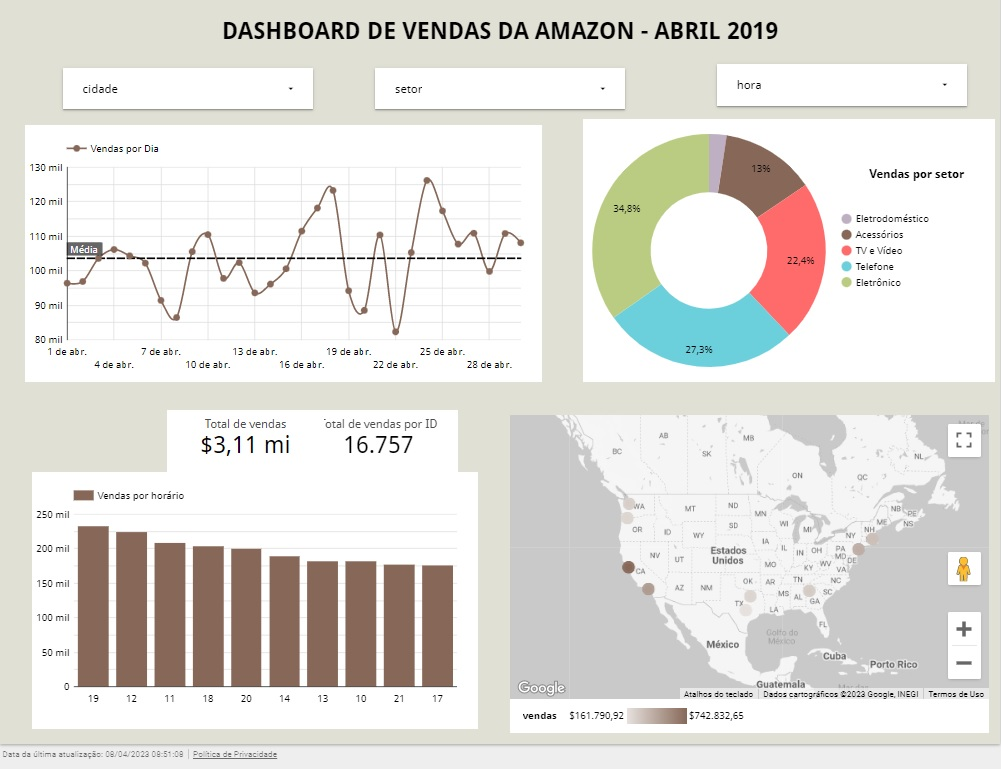

## **Conclusões**

*   1) O mês de abril teve vendas com cerca de 3.11 milhões de dolares.
*   2) Máximo de vendas no dia foi em 18/04/2019 com valor de 123 mil dolares enquanto o mínimo de vendas ocorreu em 22/04/2019 com valor de 82 mil dólares. 
*   3) Os melhores horários para vendas ocorrem entre 11-12h e 18-19h
*   4)  Cerca de 84% das vendas se concentram nos setores de eletrônico, telefone e TV e Vídeo.
*   5) As vendas se concentraram em San Francisco enquanto que Austin foi a menor arrecadação em vendas.